In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from voronoi import draw_voronoi_scatter # code from Nolan lab

# Load data

* relevant columns
    * `Imaging phenotype (cell type)`: ID of cell type. See dataframe `df_mmc` f or what each ID means
    * `X.X`: x-coordinate of cell
    * `Y.Y`: y-coordinate of cell
    * `sample_Xtile_Ytile`: type of sample (BALB for normal, MRL for diseased) and tile numbers
    

In [28]:
df_cells = pd.read_csv('MRLdatasetexpression.csv', index_col = None)
df_mmc = pd.read_excel("mmc2.xlsx")

/Users/irisyoon/opt/anaconda3/envs/CODEX/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df_cells.head()

,Imaging phenotype cluster ID,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,...,CD44,NKp46,X.X,Y.Y,Z.Z,MHCII,blank_Cy3_cyc15,blank_Cy5_cyc15,sample_Xtile_Ytile,niche cluster ID
0,9600,1577.675415,-154.301758,130.692184,-4.168493,560.691345,-504.231476,854.670105,-631.294189,385.935242,...,422.408691,515.130066,10,70,13,6712.812988,1665.967896,398.348389,BALBc-3_X05_Y03,32.0
1,9600,1017.838440,-93.069397,144.076584,40.010998,885.595520,-391.357544,62.764454,-474.201172,-469.634583,...,448.701660,171.880310,1000,294,12,2024.678711,1287.959229,421.991425,BALBc-3_X01_Y02,99.0
2,9600,5978.459961,-330.099365,139.631744,-82.840302,1747.897583,-395.508820,954.326782,-1026.204468,3744.718262,...,2229.804443,512.220764,1003,107,8,8647.193359,2817.173828,709.545105,BALBc-2_X05_Y04,74.0
3,9600,6119.109375,-54.384808,-768.871704,25.625927,1065.311890,-485.535431,538.404175,-611.836426,865.842590,...,665.720459,351.108246,1003,113,13,4838.463379,1646.660278,408.523590,BALBc-2_X03_Y04,98.0
4,9600,6272.474609,-235.512405,74.058075,-101.729919,1186.295044,-782.744995,1261.625366,-915.565552,1361.536011,...,2065.742676,259.003235,1003,148,9,5092.891602,2161.109131,713.416199,BALBc-2_X02_Y01,71.0


In [24]:
# find the sample names
indices = df_cells.sample_Xtile_Ytile.value_counts().index.tolist()
prefix = [item.split("_")[0] for item in indices]
print(set(prefix))

{'MRL-5', 'MRL-9', 'BALBc-3', 'MRL-4', 'MRL-6', 'BALBc-1', 'MRL-8', 'BALBc-2', 'MRL-7'}


<b> Tiles</b>
* 6 spleens from autoimune disease (MRL)
* 3 spleens from wildtype, by progression
    * MRL-4, -5, -6: early
    * MRL-7, -8: intermediate
    * MRL-9: late
* Under the column `sample_Xtile_Ytile`, the numbers following `X` and `Y` are tile numbers
* See Part 2 in the following analysis to see how the tiles are stitched together: https://rubd.github.io/Giotto_site/articles/mouse_CODEX_spleen_200921.html

To select a cell type, one should look at df_mmc to find the phenotype cluster ID.

For example, the ID number for CD11c B cells, is 9600.

In [30]:
df_mmc

,X-shift cluster ID,Imaging phenotype (cell type)
0,9626,plasma cells
1,9593,plasma cells
2,9641,noid
3,9644,noid
4,9605,noid
5,9615,megakaryocytes
6,9602,marginal zone mphs
7,9604,marginal zone mphs
8,9620,marginal zone mphs
9,9609,granulocytes


Plot individual cell type 

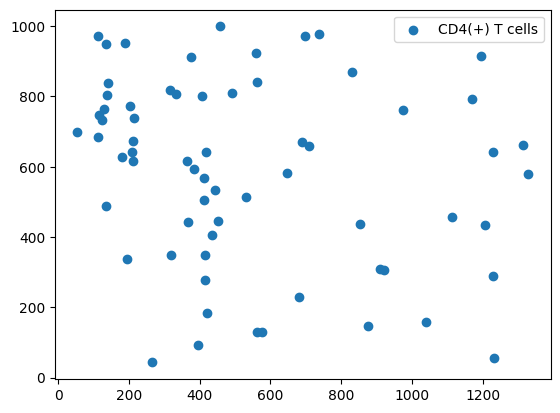

In [63]:
# visualize cells in one tile
tile = "MRL-8_X07_Y05"
ID = 9619 # for CD11 B-cells
ct = df_mmc[df_mmc["X-shift cluster ID"] == ID]["Imaging phenotype (cell type)"].values[0]

# extract relevant rows
tile_cells = df_cells[(df_cells["sample_Xtile_Ytile"] == tile) 
                         & (df_cells["Imaging phenotype cluster ID"] == ID)]

# get (x,y) coordinates
x = tile_cells["X.X"].values
y = tile_cells["Y.Y"].values

# plot
plt.scatter(x, y, label = ct)
plt.legend()
plt.show()

Plot all cells in one tile

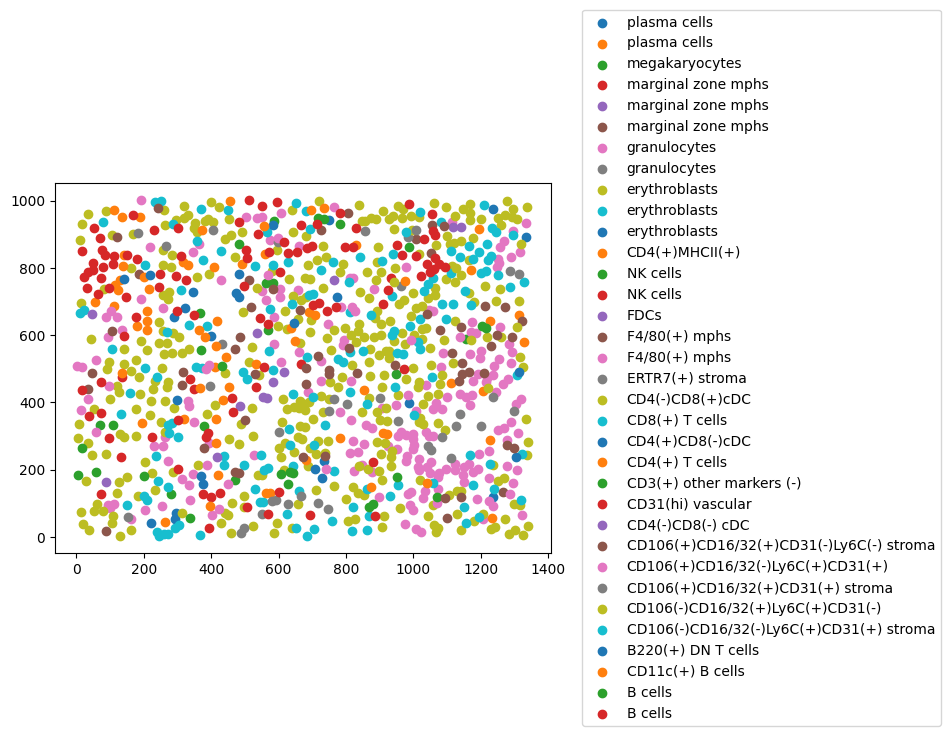

In [62]:
IDs = [9626, 9593, 9615, 9602, 9604, 9620, 9609, 9589, 9613, 9618, 9607, 9628, 9592, 9587, 9597, 9596, 9595,
 9638, 9611, 9637, 9643, 9619, 9632, 9629, 9590, 9635, 9639, 9608, 9617, 9614, 9591, 9600, 9606, 9640]
fig, ax = plt.subplots()

for ID in IDs:
    # extract relevant rows
    tile_cells = df_cells[(df_cells["sample_Xtile_Ytile"] == tile) 
                         & (df_cells["Imaging phenotype cluster ID"] == ID)]
    
    ct = df_mmc[df_mmc["X-shift cluster ID"] == ID]["Imaging phenotype (cell type)"].values[0]

    # get (x,y) coordinates
    x = tile_cells["X.X"].values
    y = tile_cells["Y.Y"].values
    
    ax.scatter(x,y, label = ct)
    
    # Add a legend
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 1, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.8, 0.5))

plt.show()